# What Sleep Quality Should You Be Getting?
    Sleep Quality Prediction Using Machine Learning

## Project Overview

Sleep is a crutial aspect of overall health and well-being, impacting physical and mental health. However, there is something more important than sleep itself which is the quality of sleep you get. This sleep quality determines how many hours you need to process the world around you. As such, this project aims to develop a machine learning model to predict sleep quality based on various features such sleep_duration, environmental factors, and personal habits. By providing insights into the factors that influence sleep quality, this model can help individuals make informed decisions about their sleep practices, ultimately promoting better health outcomes.

## Objectives

- Analyze the relationship between various factors (e.g. 'Age', 'Gender', 'University_Year', 'Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity', 'Sleep_Quality', 'Weekday_Sleep_Start', 'Weekend_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_End') and sleep quality.
- Develop a predictive model that accurately estimates sleep quality levels.
- Provide actionable insights for individuals to improve their sleep quality based on model predictions.

## Data Collection & Overview

The data set used for this project was collected kaggle's "Student Sleep Patterns" publised by Arsalan Jamal. This will be linked below. <br>
It contains the following variabels.

- **Student_ID**: Unique identifier for each student (integer).
- **Age**: Age of the student in years (integer).
- **Gender**: Gender of the student (categorical: 'Male', 'Female', 'Other').
- **University_Year**: The student's current year of university (categorical: '1st Year', '2nd Year', '3rd Year', '4th Year').
- **Sleep_Duration**: Total hours of sleep per night (float).
- **Study_Hours**: Average number of hours spent studying per day (float).
- **Screen_Time**: Average number of hours spent on screens (excluding studying) per day (float).
- **Caffeine_Intake**: Average number of caffeinated beverages consumed per day (integer).
- **Physical_Activity**: Average minutes spent on physical activity per day (integer).
- **Sleep_Quality**: Subjective rating of sleep quality on a scale of 1 to 10 (1 being the worst, 10 being the best) (integer).
- **Weekday_Sleep_Start**: Time the student typically goes to sleep on weekdays (float, in 24-hour format, e.g., 23.00 is 11 PM).
- **Weekend_Sleep_Start**: Time the student typically goes to sleep on weekends (float, in 24-hour format).
- **Weekday_Sleep_End**: Time the student typically wakes up on weekdays (float, in 24-hour format).
- **Weekend_Sleep_End**: Time the student typically wakes up on weekends (float, in 24-hour format).

The dataset consists of 500 entries and 14 features, providing a comprehensive overview of the factors affecting sleep quality.


In [1]:
# Import needed libraries
import pandas as pd
import numpy as np

# import sleep data
sleep_data = pd.read_csv('student_sleep_patterns.csv')

In [2]:
print(sleep_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB
None


In [3]:
print(sleep_data.describe(include='all'))

        Student_ID        Age Gender University_Year  Sleep_Duration  \
count   500.000000  500.00000    500             500      500.000000   
unique         NaN        NaN      3               4             NaN   
top            NaN        NaN   Male        3rd Year             NaN   
freq           NaN        NaN    186             132             NaN   
mean    250.500000   21.53600    NaN             NaN        6.472400   
std     144.481833    2.33315    NaN             NaN        1.485764   
min       1.000000   18.00000    NaN             NaN        4.000000   
25%     125.750000   20.00000    NaN             NaN        5.100000   
50%     250.500000   21.00000    NaN             NaN        6.500000   
75%     375.250000   24.00000    NaN             NaN        7.800000   
max     500.000000   25.00000    NaN             NaN        9.000000   

        Study_Hours  Screen_Time  Caffeine_Intake  Physical_Activity  \
count    500.000000   500.000000       500.000000         500.0

In [4]:
print(sleep_data.head(5))

   Student_ID  Age Gender University_Year  Sleep_Duration  Study_Hours  \
0           1   24  Other        2nd Year             7.7          7.9   
1           2   21   Male        1st Year             6.3          6.0   
2           3   22   Male        4th Year             5.1          6.7   
3           4   24  Other        4th Year             6.3          8.6   
4           5   20   Male        4th Year             4.7          2.7   

   Screen_Time  Caffeine_Intake  Physical_Activity  Sleep_Quality  \
0          3.4                2                 37             10   
1          1.9                5                 74              2   
2          3.9                5                 53              5   
3          2.8                4                 55              9   
4          2.7                0                 85              3   

   Weekday_Sleep_Start  Weekend_Sleep_Start  Weekday_Sleep_End  \
0                14.16                 4.05               7.41   
1       

## Filtering & Preprocessing Data

In [5]:
# Dropping Student_ID feature as it would provide no value to our algorithm
sleep_data.drop(columns='Student_ID', inplace=True)

**Missing Values**

In [6]:
print(sleep_data.dtypes)

Age                      int64
Gender                  object
University_Year         object
Sleep_Duration         float64
Study_Hours            float64
Screen_Time            float64
Caffeine_Intake          int64
Physical_Activity        int64
Sleep_Quality            int64
Weekday_Sleep_Start    float64
Weekend_Sleep_Start    float64
Weekday_Sleep_End      float64
Weekend_Sleep_End      float64
dtype: object


Using this we can see that each variable is of appropriate type for the data they should be holding.

In [7]:
# Create list with columns for future reference

numerical_cols = ['Age', 'Sleep_Duration',
       'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity',
       'Sleep_Quality', 'Weekday_Sleep_Start', 'Weekend_Sleep_Start',
       'Weekday_Sleep_End', 'Weekend_Sleep_End']

categorical_cols = ['Gender', 'University_Year']

In [8]:
# Iterate through each feature
for col in sleep_data.columns:
    print(col)                          # Print Name
    print(sleep_data[col].unique())     # Print Unique Values
    print(sleep_data[col].describe())   # Print Info On Feature
    print('\n')

Age
[24 21 22 20 25 19 23 18]
count    500.00000
mean      21.53600
std        2.33315
min       18.00000
25%       20.00000
50%       21.00000
75%       24.00000
max       25.00000
Name: Age, dtype: float64


Gender
['Other' 'Male' 'Female']
count      500
unique       3
top       Male
freq       186
Name: Gender, dtype: object


University_Year
['2nd Year' '1st Year' '4th Year' '3rd Year']
count          500
unique           4
top       3rd Year
freq           132
Name: University_Year, dtype: object


Sleep_Duration
[7.7 6.3 5.1 4.7 4.9 6.5 6.1 8.6 5.8 6.9 7.2 4.1 7.3 8.8 4.4 9.  7.  4.3
 5.  8.5 4.2 6.4 6.8 7.9 6.6 6.2 6.  4.8 8.3 8.7 5.9 5.4 7.6 5.2 7.4 4.5
 8.  8.2 5.5 8.1 5.7 5.3 7.1 7.8 6.7 8.9 4.6 8.4 7.5 5.6 4. ]
count    500.000000
mean       6.472400
std        1.485764
min        4.000000
25%        5.100000
50%        6.500000
75%        7.800000
max        9.000000
Name: Sleep_Duration, dtype: float64


Study_Hours
[ 7.9  6.   6.7  8.6  2.7 12.  11.7  7.8  2.4  8.2  0.9 

Using this loop, we can see the unique values for each numerical feature and are able to verify that there are no null values contained within the features.

**Encoding Categorical Variables**

In [9]:
# Save Old Categorical Data
old_cat = sleep_data[['Gender', 'University_Year']]

# Create a new col for each feature except the first which occurs when all other vars are false
sleep_data = pd.get_dummies(sleep_data, columns=categorical_cols, drop_first=True)

# Reset Categorical Columns
categorical_cols = ['Gender_Male', 'Gender_Other',
       'University_Year_2nd Year', 'University_Year_3rd Year',
       'University_Year_4th Year']

## EDA

In [10]:
# Import necessary addons
import matplotlib.pyplot as plt
import seaborn as sns

**Feature Creation**

In [11]:
# Create a feature for weekday & weekend sleep
sleep_data['Weekday_Sleep'] = sleep_data['Weekday_Sleep_Start'] - sleep_data['Weekday_Sleep_End']
sleep_data['Weekend_Sleep'] = sleep_data['Weekend_Sleep_Start'] - sleep_data['Weekend_Sleep_End']
numerical_cols.extend(['Weekday_Sleep', 'Weekend_Sleep']) # Add to numerical_cols

**Visualization & Feature Scaling/Normalization**

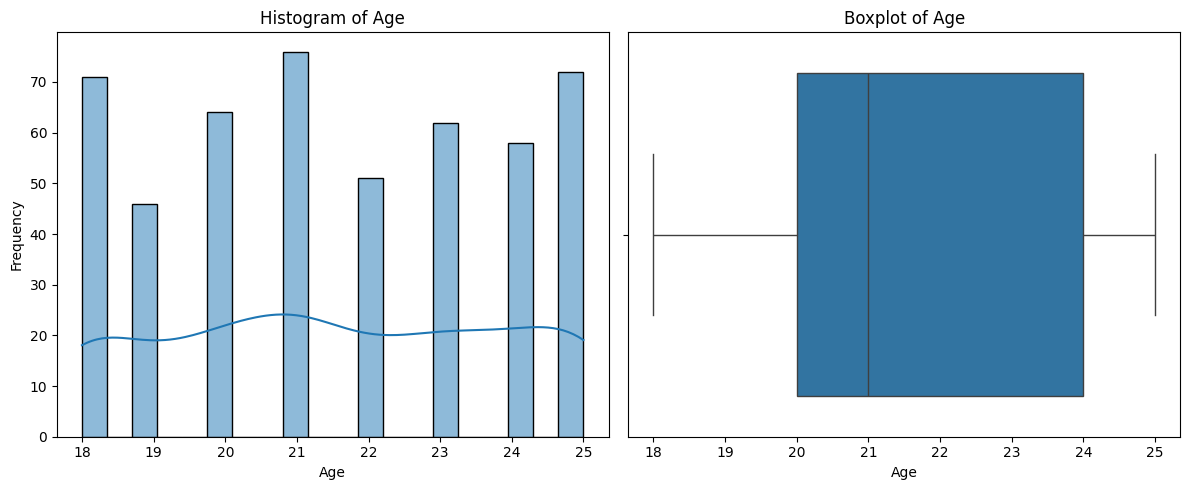

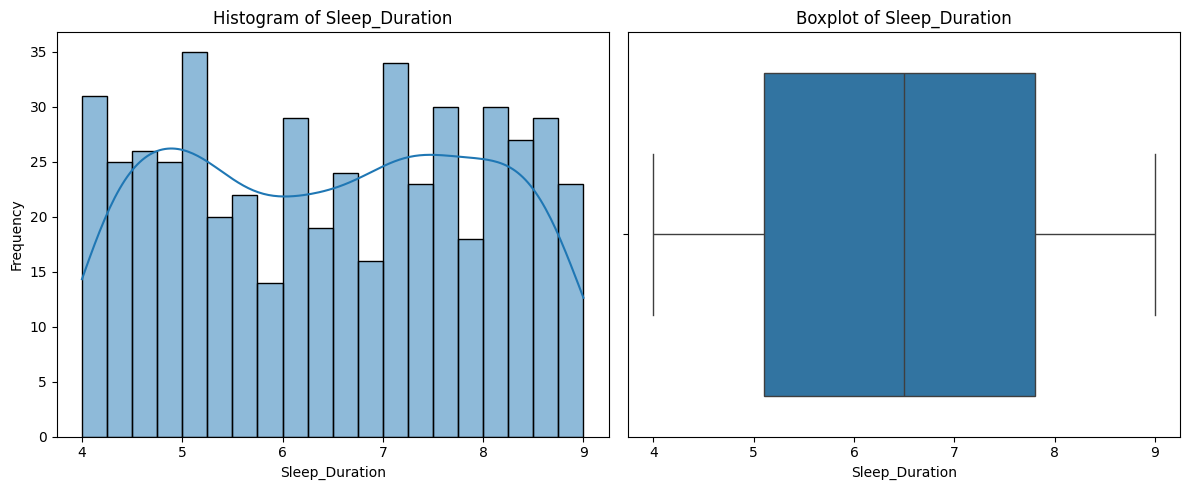

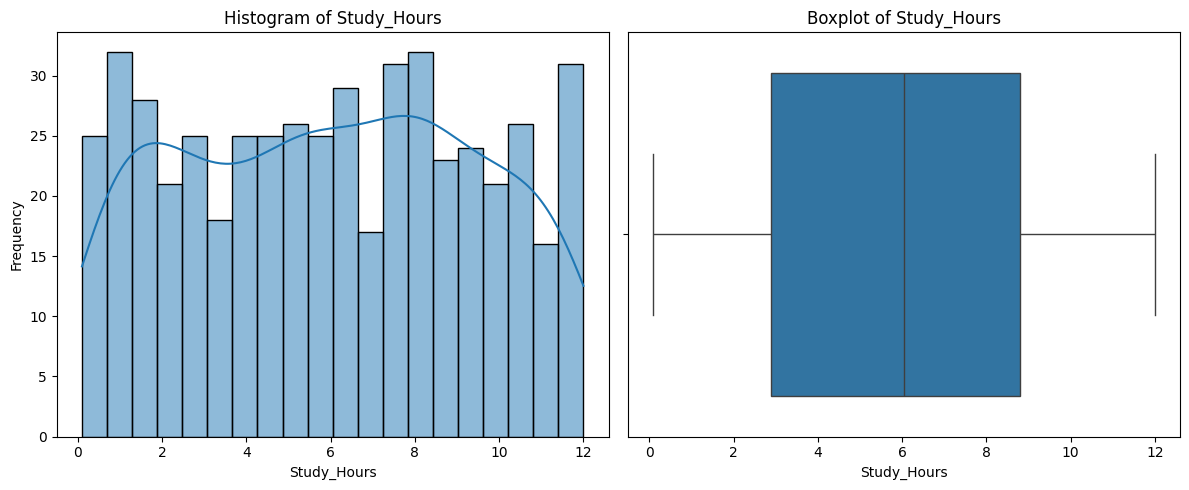

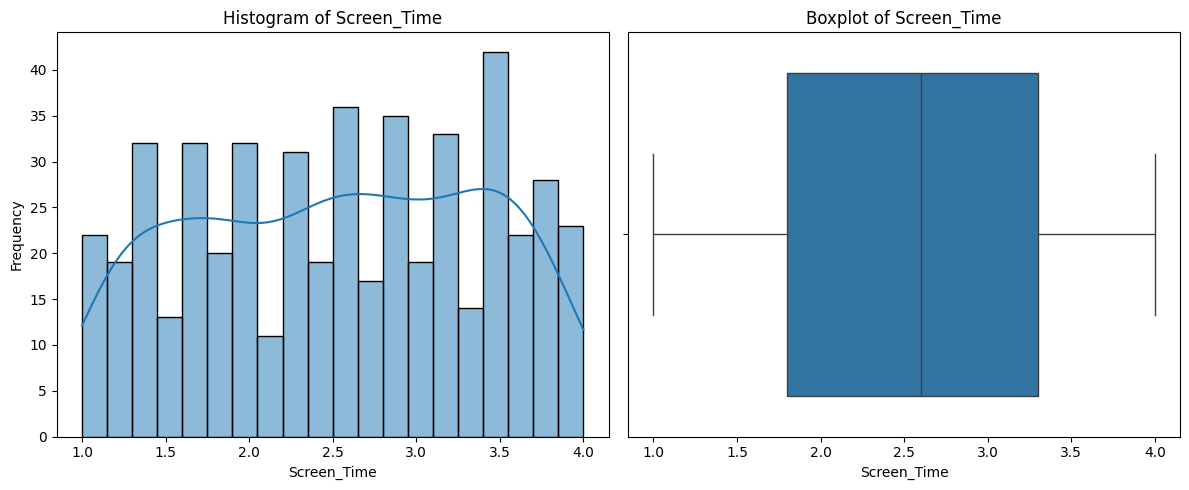

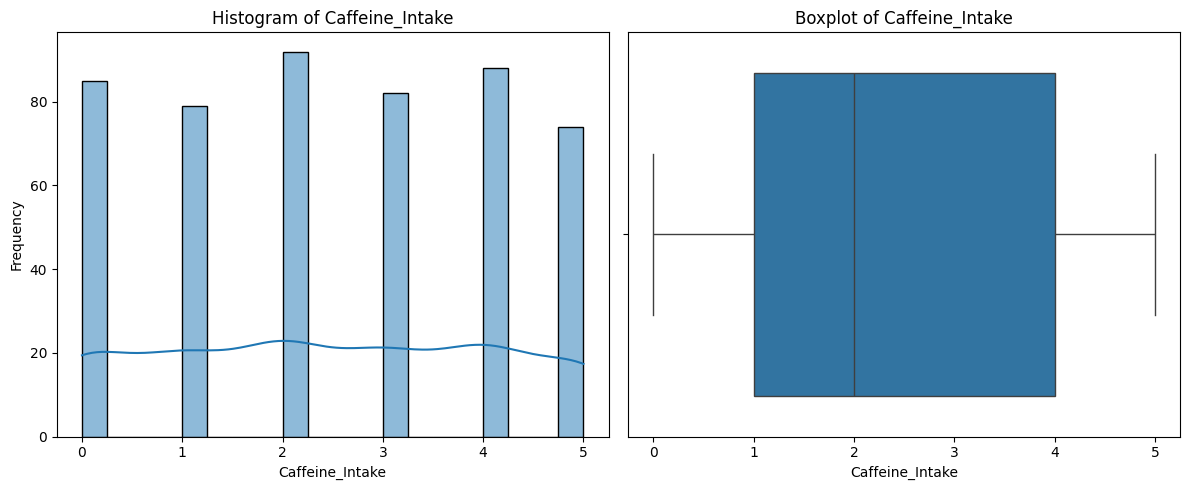

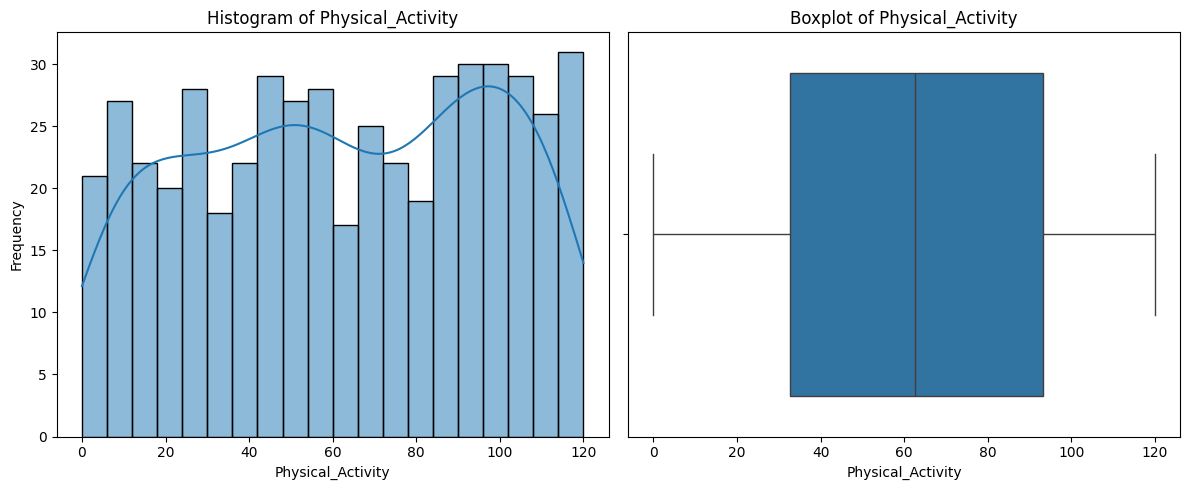

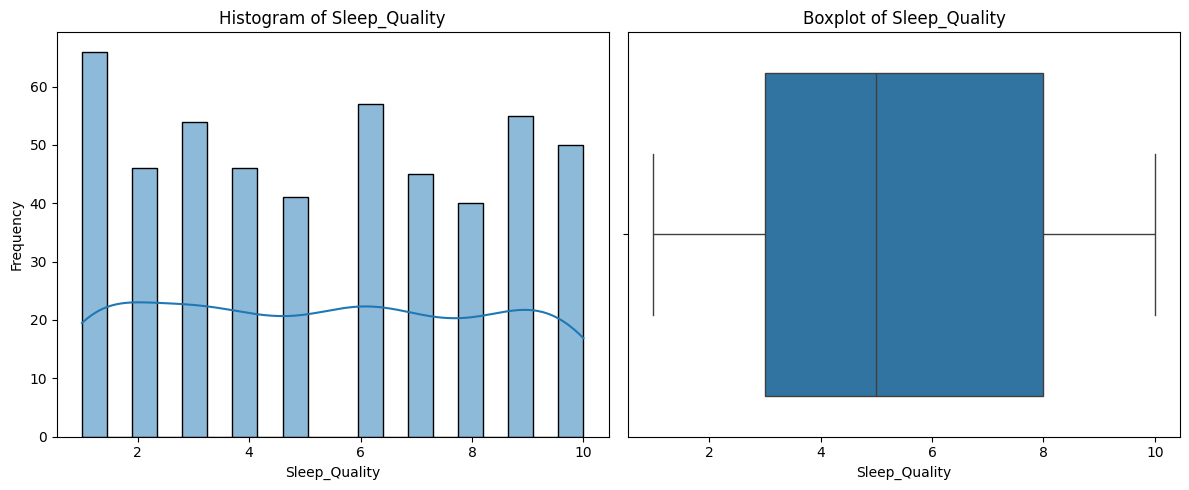

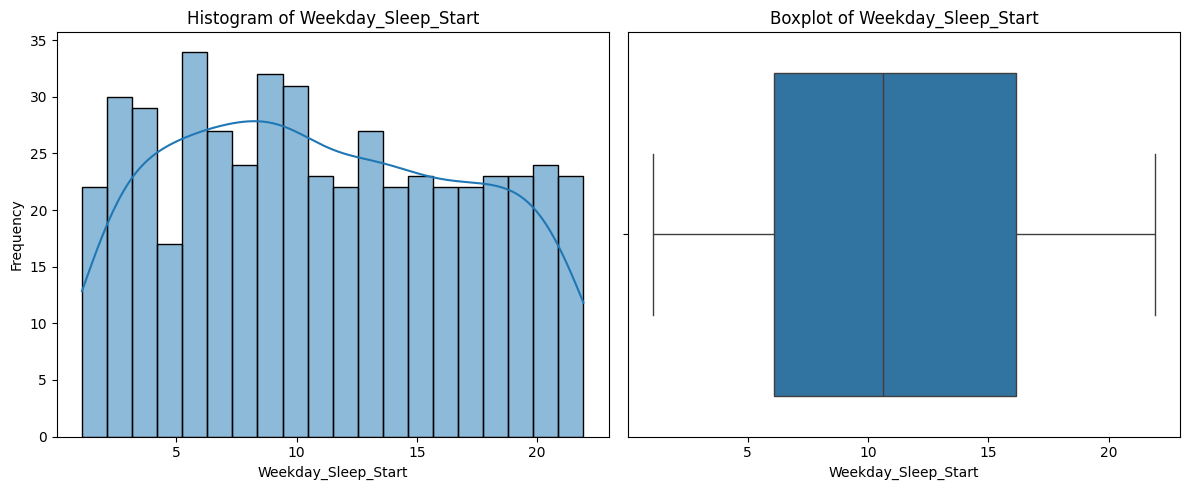

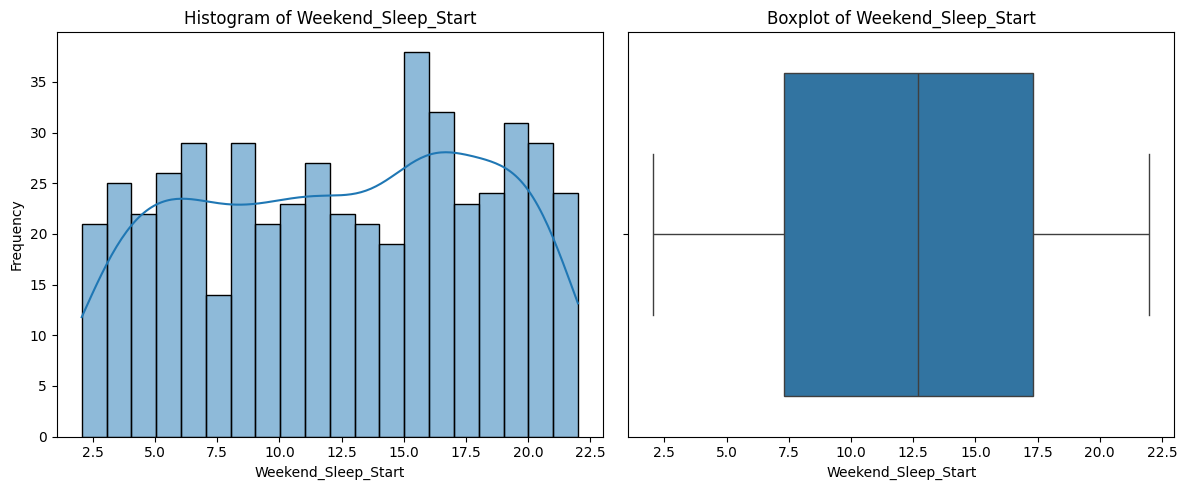

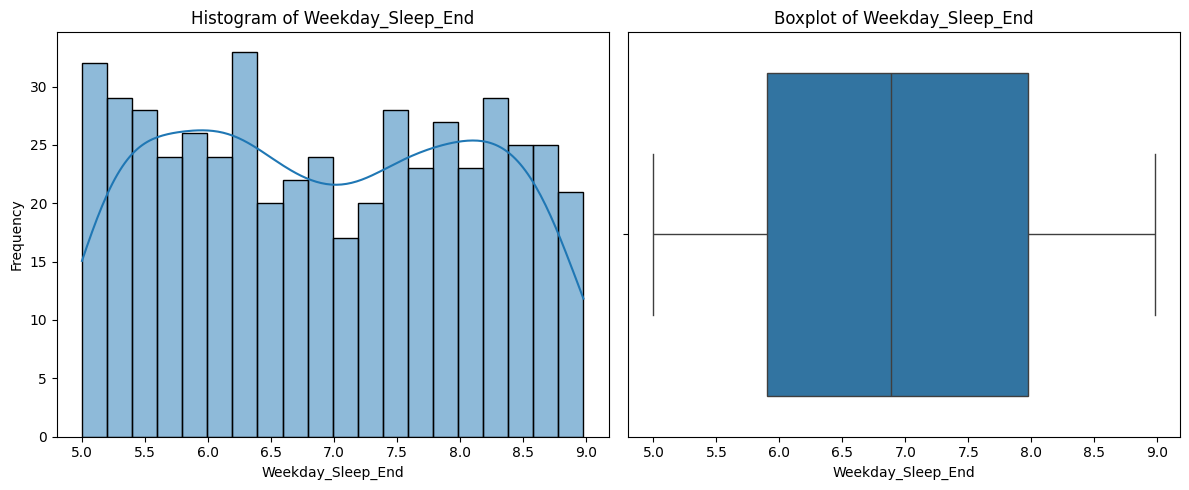

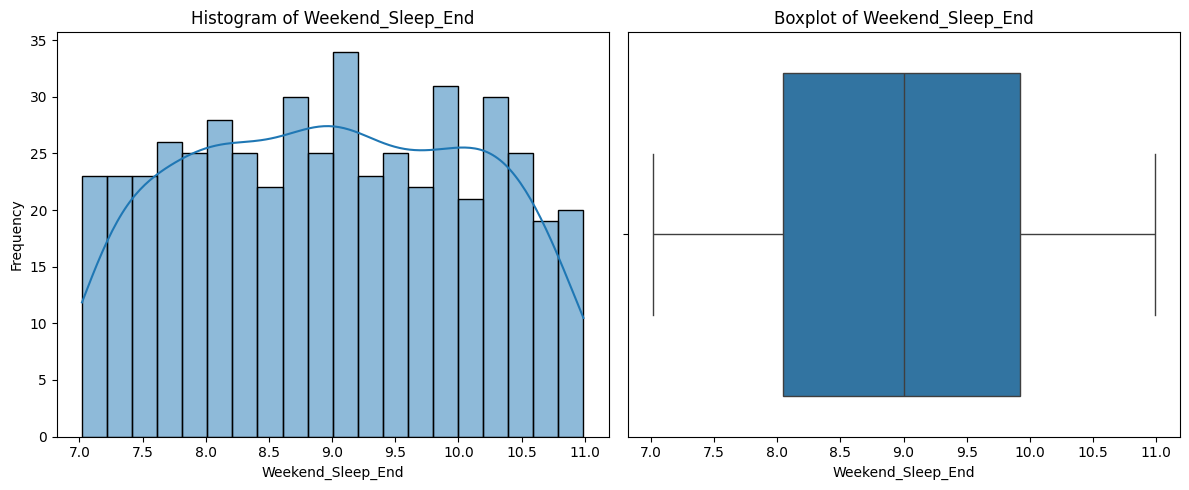

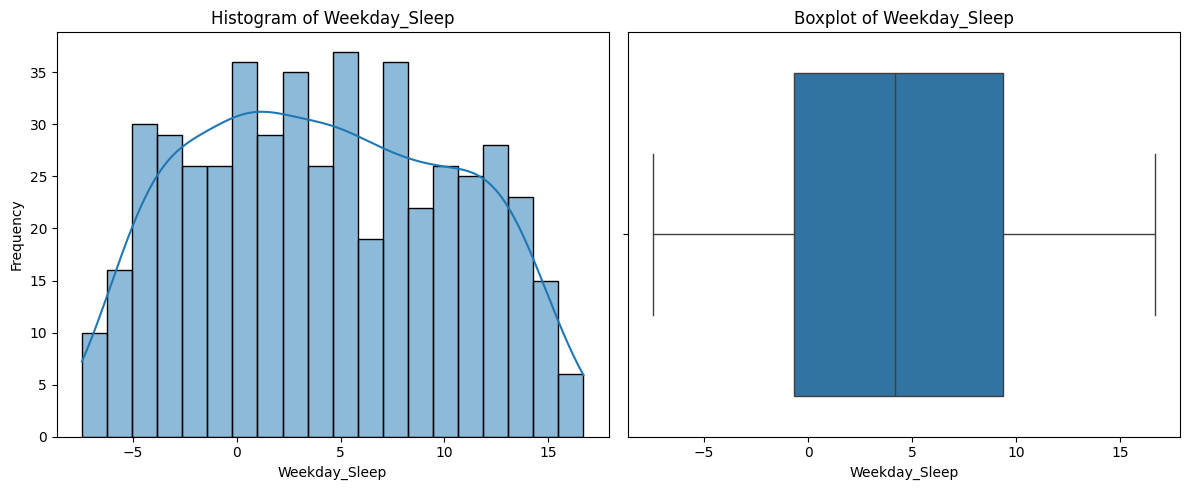

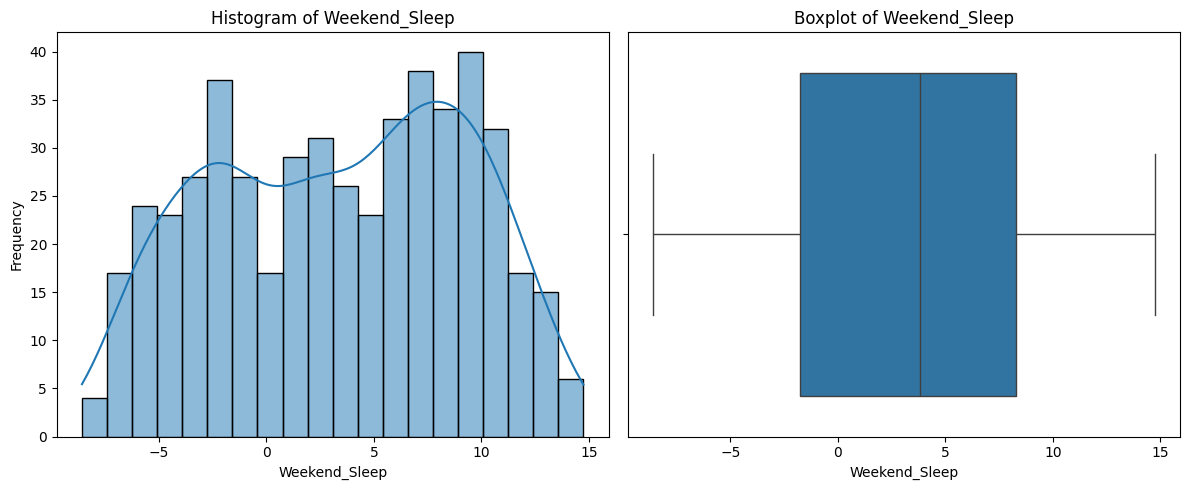

In [12]:
for col in numerical_cols:
    # Create Subplots plotting histogram & box & whiskers for each feature
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)

    # Histogram of Feature
    sns.histplot(sleep_data[col], bins=20, kde=True)
    plt.title('Histogram of {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot of Feature
    plt.subplot(1, 2, 2)
    sns.boxplot(x=sleep_data[col])
    plt.title('Boxplot of {}'.format(col))
    plt.xlabel(col)  # Adjust the label based on your data

    plt.tight_layout()
    plt.show()

From this we can see that most of the features present are mostly uniformly distrubuted and wouldn't need to be normalized.

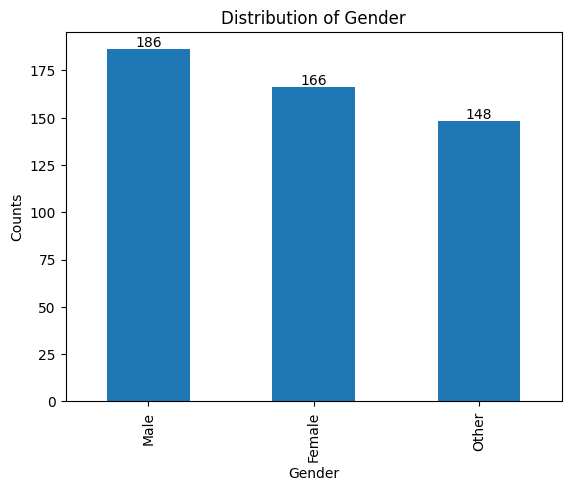

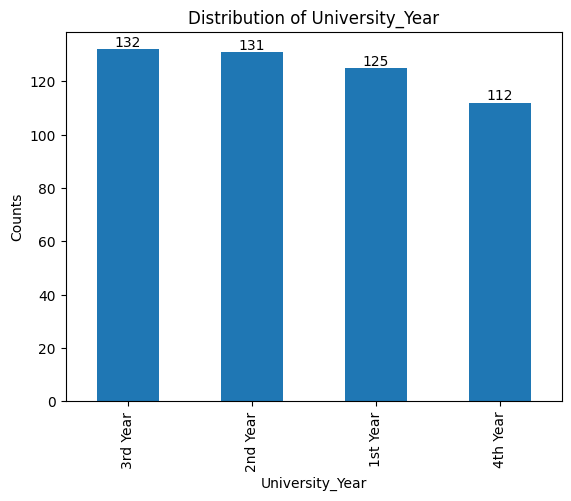

In [13]:
# Loop through each column in old_cat
for col in old_cat:
    # Get value counts
    counts = old_cat[col].value_counts()
    
    # Plot
    counts.plot(kind='bar')
    
    # Add titles and labels
    plt.title('Distribution of {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Counts')
    
    # Show counts on the bars
    for index, value in enumerate(counts):
        plt.text(index, value, str(value), ha='center', va='bottom')

    plt.show()


With this, we can see that Gender & University Year are both relatively evenly distibuted; however there are more 25% more Males than Other

**Correlation Analysis**

Numerical Features Correlation with Sleep Quality:


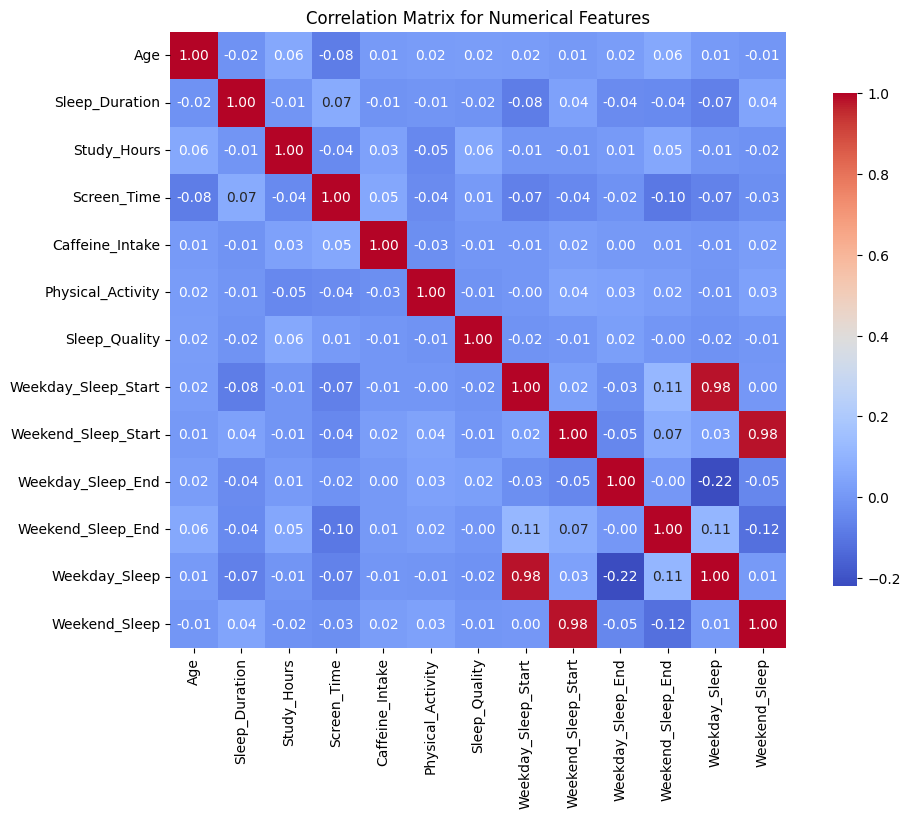

In [14]:
# Calculate the correlation matrix for numerical features
correlation_matrix = sleep_data[numerical_cols].corr()

# Print the correlation with Sleep Quality
print("Numerical Features Correlation with Sleep Quality:")

# Create a heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix for Numerical Features')
plt.show()

We can also see how each feature is correlated to the Sleep Quality graphically.

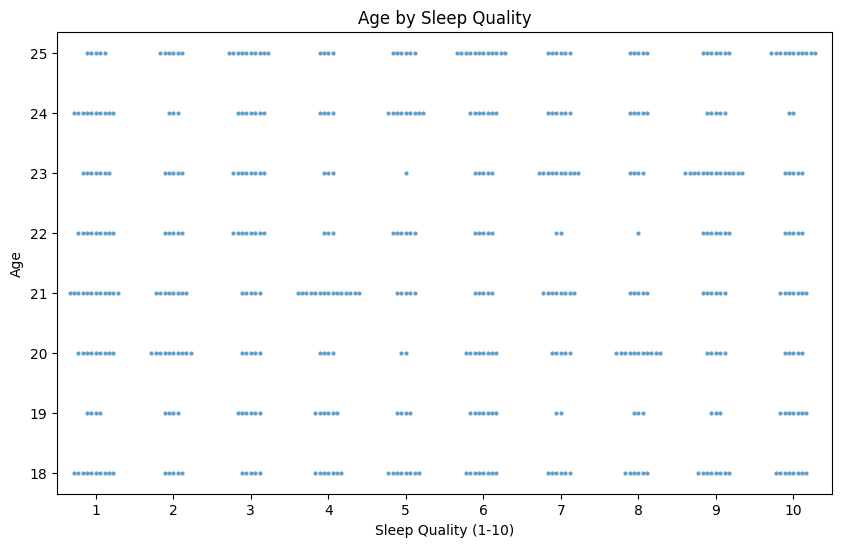

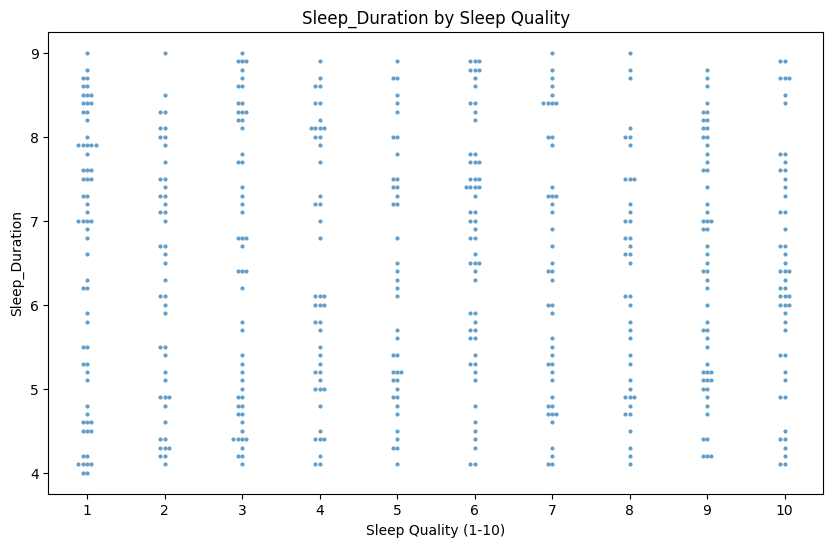

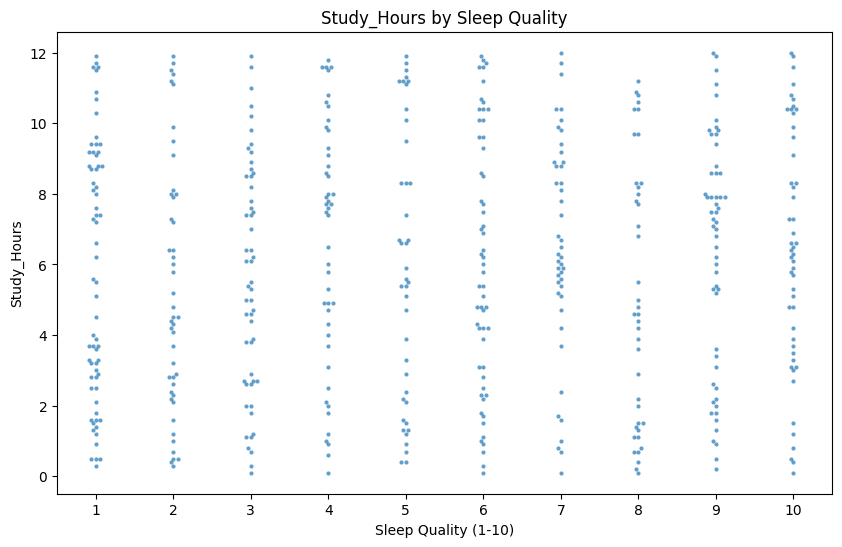

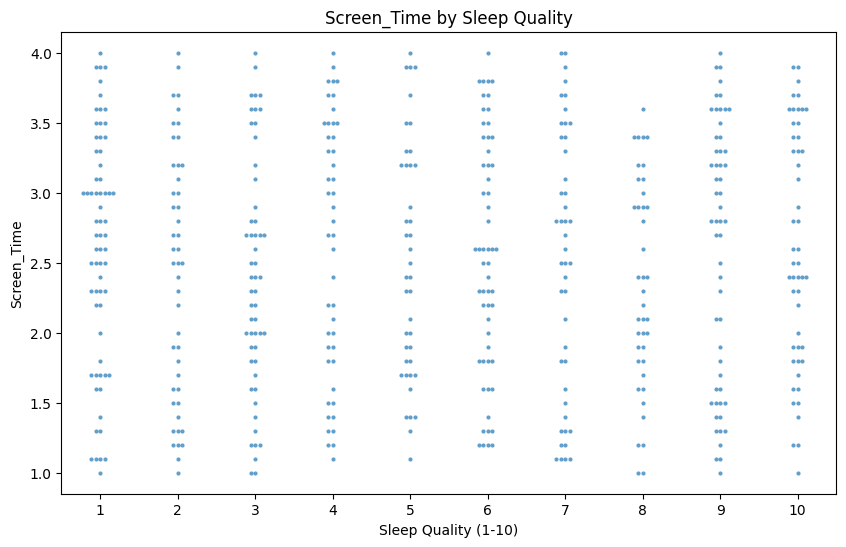

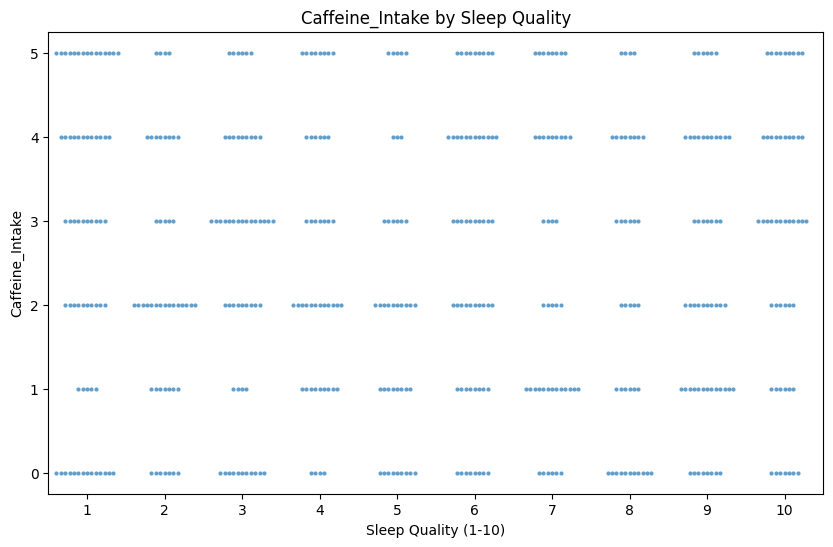

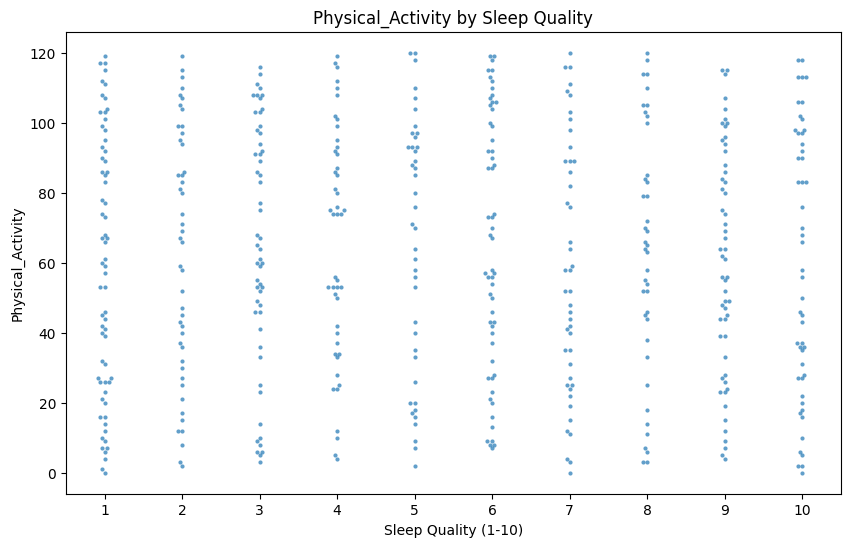

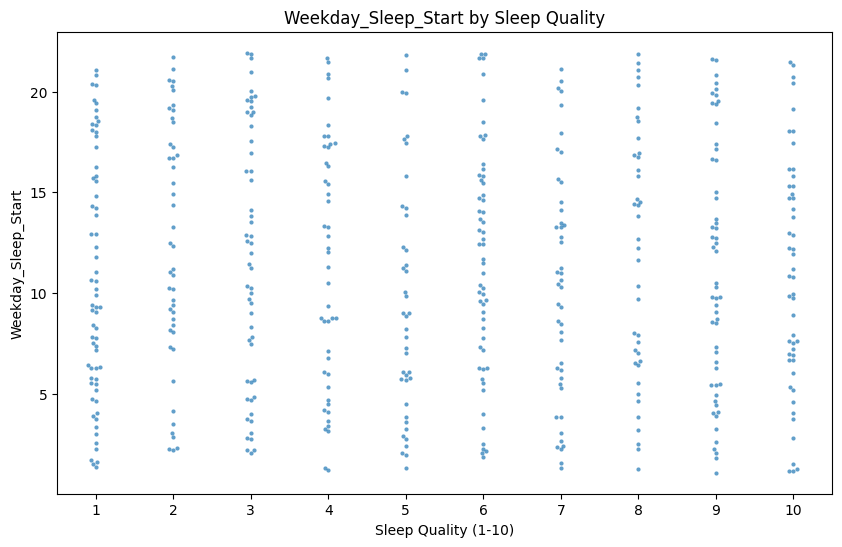

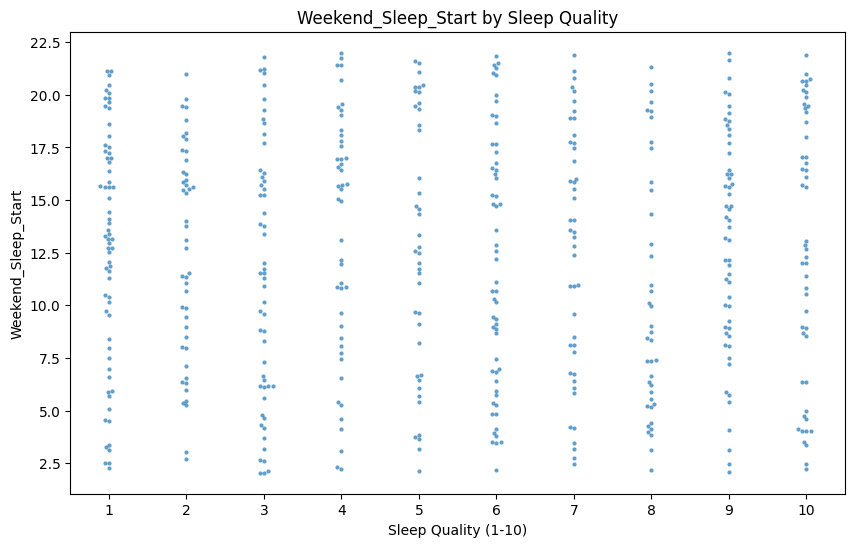

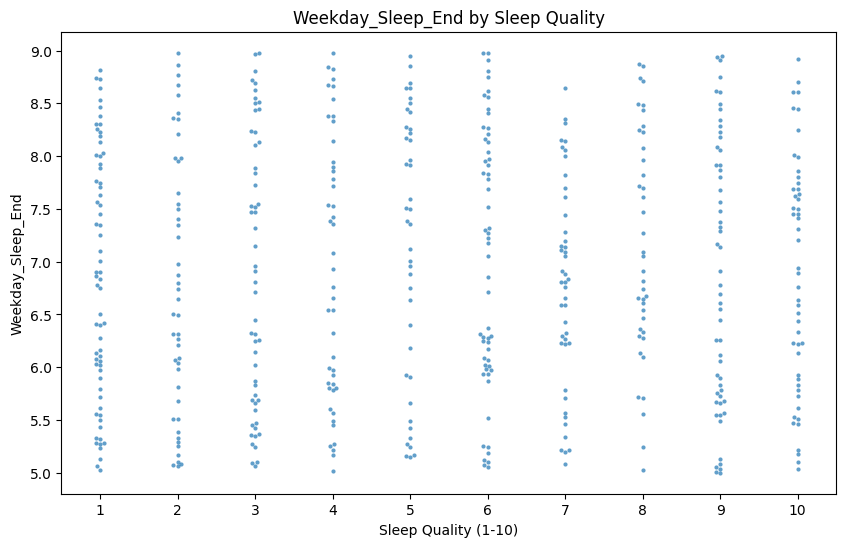

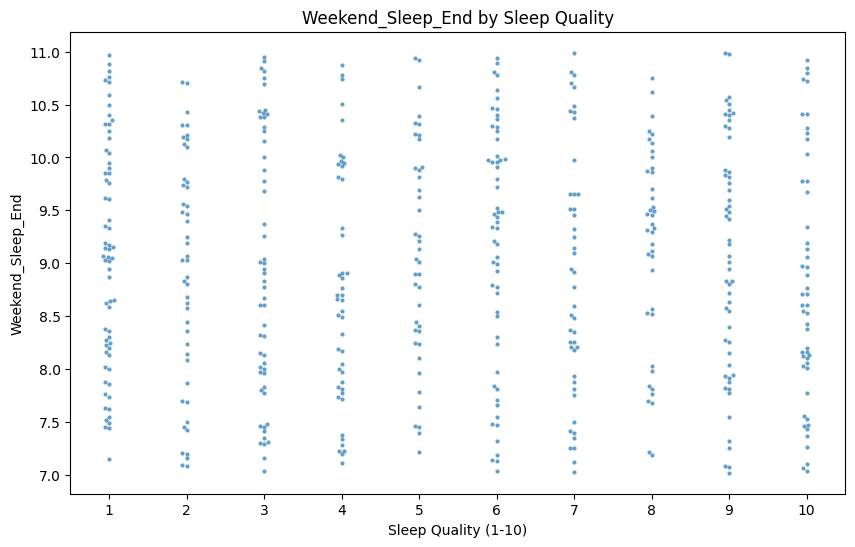

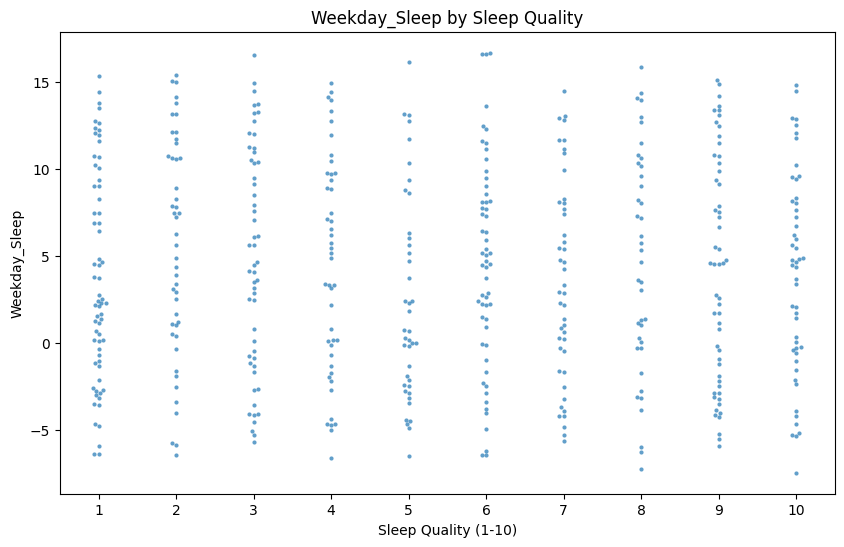

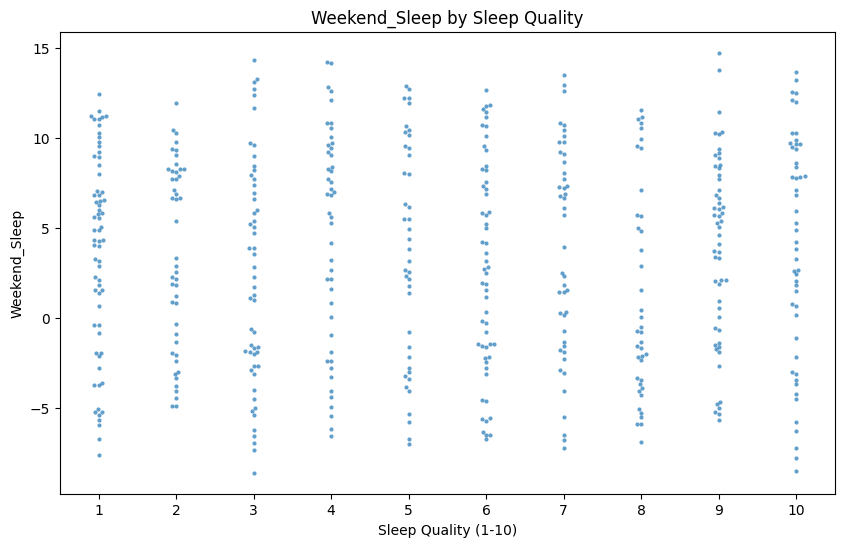

In [15]:
for col in numerical_cols:
    if col == 'Sleep_Quality': continue
    plt.figure(figsize=(10, 6))
    sns.swarmplot(x='Sleep_Quality', y=col, data=sleep_data, alpha=0.7, size=3)  # Adjust size as needed
    plt.title('{} by Sleep Quality'.format(col))
    plt.xlabel('Sleep Quality (1-10)')
    plt.ylabel(col)
    plt.show()


From both, the correlation matrix and comparing each feature individually, we can see that there are not appearent correlations and or trend in any of the features when comparing to Sleep_Quality.

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

# Splitting data into x and y
x = sleep_data.drop(columns=['Sleep_Quality'])
y = sleep_data['Sleep_Quality']

# Setting the Split with .2 of values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

## Model Selection

As we are attempting to find an ordinal categorical variable, we are able to 

Considering the data is uniformly distributed, a random forest ensemble method might be beneficial as it works off multiple different features instead of focusing on a single feature.

However, knowing that there is no correlation, it might be better to try multiple different algorithms. As such, we will use Random Forest for its ability to handle complex interactions, SVM for its effectiveness in high-dimensional spaces, and Linear Regression to provide a simple, interpretable baseline.

In [17]:
# Import necessary modules
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


# Create models
Forest_Model = RandomForestRegressor(max_features= 3, n_estimators=100, random_state=12)
SVM_Model = SVR()
Linear_Model = LinearRegression()

## Model Training

**Fit & Tuning Models**

In [18]:
# Define the hyperparameter grid for Random Forest
forest_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_features': [1, 2, 3, 'sqrt'],  # Number of features 
    'max_depth': [None, 10, 20, 30],  # Maximum depth 
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required
}


forest_grid_search = GridSearchCV(RandomForestRegressor(random_state=12), 
                                   forest_param_grid, # Grid defined above
                                   cv=5, # number of cross-validations
                                   scoring='neg_root_mean_squared_error') # Score with Neg. RSME

# Fit the grid search to the training data
forest_grid_search.fit(x_train, y_train)

# Retrieve the best estimator (model) found during the search
best_forest_model = forest_grid_search.best_estimator_

In [19]:
# Hyperparameter tuning for SVM
svm_param_grid = {
    'C': [0.1, 1, 10], # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1], # Kernel 
    'kernel': ['linear', 'rbf'] # Kernel type
}

svm_grid_search = GridSearchCV(SVR(), 
                                svm_param_grid, 
                                cv=5, 
                                scoring='neg_root_mean_squared_error')

# Fit the grid search to the training data
svm_grid_search.fit(x_train, y_train)

# Retrieve the best estimator (model) found during the search
best_svm_model = svm_grid_search.best_estimator_

In [20]:
# Import necessary modules for tuning
from sklearn.linear_model import Ridge

# Hyperparameter tuning for Ridge Regression
ridge_param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0] # Regularization Strength
}

ridge_grid_search = GridSearchCV(Ridge(), 
                                  ridge_param_grid, 
                                  cv=5, 
                                  scoring='neg_root_mean_squared_error')

# Fit the grid search to the training data
ridge_grid_search.fit(x_train, y_train)

# Retrieve the best estimator (model) found during the search
best_ridge_model = ridge_grid_search.best_estimator_

**Create Predictions w/ best models**

In [21]:
Forest_y_pred_tuned = best_forest_model.predict(x_test)
SVM_y_pred_tuned = best_svm_model.predict(x_test)
Linear_y_pred_tuned = best_ridge_model.predict(x_test)

## Model Evaluation

**Metrics/Results**

We will be using Root Mean Squared Error to quantify performance

In [22]:
# Create Root Mean Squared Error Function
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [23]:
# Evaluate the classifier
Forest_RMSE = calculate_rmse(y_test, Forest_y_pred_tuned)
SVM_RMSE = calculate_rmse(y_test, SVM_y_pred_tuned)
Linear_RMSE = calculate_rmse(y_test, Linear_y_pred_tuned)

# Print RMSE values
print("Random Forest Regression RMSE: {}".format(Forest_RMSE))
print("SVM Regression RMSE: {}".format(SVM_RMSE))
print("Linear Regression RMSE: {}".format(Linear_RMSE))

Random Forest Regression RMSE: 3.052498548890348
SVM Regression RMSE: 3.038229480717991
Linear Regression RMSE: 3.1022224244087604


In [24]:
# Create a DataFrame for predictions
data = {
    'Actual': y_test,
    'Random Forest': Forest_y_pred_tuned,
    'SVM': SVM_y_pred_tuned,
    'Linear Regression': Linear_y_pred_tuned
}

predictions_df = pd.DataFrame(data)

# Print the DataFrames
print("Predictions DataFrame:")
print(predictions_df.head(10))

print(predictions_df.describe())


Predictions DataFrame:
     Actual  Random Forest       SVM  Linear Regression
475       8       5.445834  5.382496           5.101324
385       7       5.213476  5.356873           5.070484
167       1       5.737840  5.354466           5.874793
40        2       4.689869  5.492419           4.785409
350       9       5.417146  5.355102           4.748391
42        7       5.774284  5.354663           5.777816
250       9       5.296537  5.327395           5.296463
469       5       5.032133  5.341122           4.956604
6         6       5.791393  5.712586           5.616586
159      10       5.607119  5.388882           5.472458
          Actual  Random Forest         SVM  Linear Regression
count  100.00000     100.000000  100.000000         100.000000
mean     5.41000       5.429477    5.369071           5.354108
std      3.04543       0.331211    0.101093           0.363371
min      1.00000       4.530240    5.104762           4.565670
25%      2.75000       5.227800    5.349258   

As you can see through the dataframe, and accuracy values, the **SVM** model tends to preform better than both the Random Forest and the Linear Regression model. This can possibly be attributed to how SVM works with multiple different features well and a lower standard deviation which likely indicates, and is varified, that the mean of the actual values is 5. This meaning that is is more optimal to guess a value close to 5 than to try and estimate an appropriate value.

## Conclusion

In this project, we evaluated the performance of three regression models: Random Forest Regression, Support Vector Machine (SVM) Regression, and Linear Regression. The final Root Mean Squared Error (RMSE) values for each model were as follows:
- Random Forest Regression RMSE: 3.0525
- SVM Regression RMSE: 3.0382
- Linear Regression RMSE: 3.1022

Despite the careful selection and tuning of these models, none exhibited particularly strong performance in predicting the target variable, as indicated by their relatively close RMSE values. This similarity suggests that while the models captured some patterns in the data, they did not provide highly accurate predictions.

The predictions made by the models were fairly consistent, with the SVM model performing slightly better than the others on average. The detailed predictions revealed that all models tended to underestimate or overestimate the actual values in a similar range.

Some further reasearch that would be beneficial to a machine learning model could be collecting additional and more optimal record that would assist.